## Part 1: Quick View on Kickstarter's Data

In [1]:
# import data set and libraires for data processing 
import numpy as np 
import pandas as pd

df = pd.read_csv('HW3_kickstarter.csv')

In [2]:
# Take a look on the first few rows of the data set
df.head()

,id,name,goal,pledged,state,country,currency,currency_trailing_code,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight
0,1526127826,conceptual-waist-aprons,300.0,321.00,successful,US,USD,True,False,18,1.000000,321.000000,Conceptual Art,True
1,2007987502,mjolby-porslinsravsmuseum-pin,3000.0,7070.00,successful,SE,SEK,True,False,79,0.121226,857.068103,Conceptual Art,True
2,1075407414,cool-dog-annual-sticker-fund-2016,3200.0,4431.12,successful,US,USD,True,False,148,1.000000,4431.120000,Conceptual Art,True
3,1038608633,uss-coral-sea-cvb-cva-cv-43-commemorative-chal...,2100.0,2500.00,successful,US,USD,True,False,56,1.000000,2500.000000,Conceptual Art,True
4,451699826,amrita-bottles-inc,1950.0,2240.00,successful,US,USD,True,False,31,1.000000,2240.000000,Conceptual Art,True


## Part 2: Exploratory Analysis

******First, we want to know the average pledged amount across all projects and the percentage of projects receiving more than $2,500 in funding.******

In [3]:
# Load the pledge amount (in US dollar) data across all projects
amount_pledged = df['usd_pledged']

In [4]:
# Display decriptive statisitcs of amount pledged acorss all projects
amount_pledged.describe()

count      4184.000000
mean       1242.124269
std        5178.546874
min           0.000000
25%           1.000000
50%          90.000000
75%         605.250000
max      111111.770000
Name: usd_pledged, dtype: float64

In [5]:
# Calculate the percentage of projects that earned total pledges of at least $2,500
mask1 = amount_pledged >= 2500
print(mask1.value_counts())

at_least_2500 = mask1.value_counts()[1] / mask1.value_counts().sum()
print()
print(at_least_2500)

False    3741
True      443
Name: usd_pledged, dtype: int64

0.10587954110898662


From the calculation, it looks like only about 11% of the projects earned more than $2,500 pledge amount.

******Next, we want to know which category holds most projects in Kickstarter.******

In [6]:
# Load the project categories data 
categories = df['category']

In [7]:
# Display the frequency of each category and the percentage of each category observations
frequency = categories.value_counts()
print(frequency)
print()

percentage = frequency / frequency.sum()
print(percentage)

Painting          1586
Digital Art       1054
Conceptual Art     879
Illustration       461
Ceramics           204
Name: category, dtype: int64

Painting          0.379063
Digital Art       0.251912
Conceptual Art    0.210086
Illustration      0.110182
Ceramics          0.048757
Name: category, dtype: float64


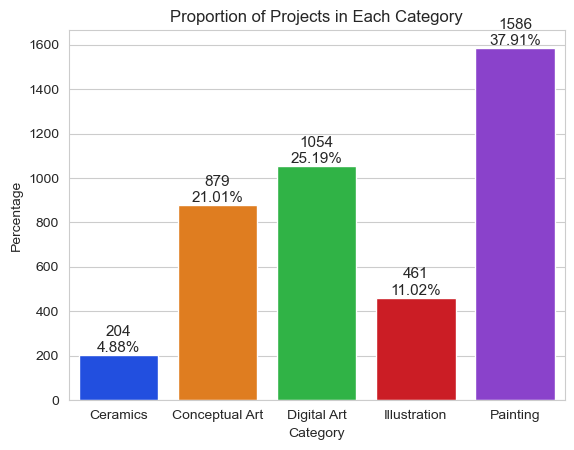

In [8]:
# Use bar charts to show each category frequency
import matplotlib.pyplot as plt
import seaborn as sns

values, frequencies = np.unique(categories, return_counts=True)
title = "Proportion of Projects in Each Category"

sns.set_style("whitegrid") 
axes = sns.barplot(x=values, y=frequencies , palette='bright') 
axes.set_title(title)
axes.set(xlabel='Category', ylabel='Percentage')

for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0 
    text_y = bar.get_height() 
    text = f'{frequency}\n{frequency / sum(frequencies):.2%}'
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

From the bar chart, we can see that:

1. Ceramics and Illustration have least projects in Kickstarter.
2. Painting almost holds 40% of the projects in Kickstarter.

******Next, we want to know the percentage of success rate for each category.******

In [9]:
# Load the project states data 
category_state = df[['category','state']].copy()

In [10]:
# Transform the project's state to 0 and 1, where 1 means success and 0 means unsuccess.
# This stage of process is to create dummy variable for further data processing.
mask2 = category_state['state'] == 'successful'
category_state.loc[mask2, 'state'] = 1

mask3 = ~mask2
category_state.loc[mask3, 'state'] = 0
category_state

,category,state
0,Conceptual Art,1
1,Conceptual Art,1
2,Conceptual Art,1
3,Conceptual Art,1
4,Conceptual Art,1
...,...,...
4179,Painting,0
4180,Painting,0
4181,Painting,0
4182,Painting,0


In [11]:
# Calculate the number of success projects for each category
success = category_state.groupby('category')['state'].sum()
print(success)

category
Ceramics           84
Conceptual Art    322
Digital Art       286
Illustration        0
Painting            0
Name: state, dtype: object


In [12]:
# Calculate the total number of projects for each category
all_projects =df[['category','state']].groupby('category')['state'].count()
print(all_projects)

category
Ceramics           204
Conceptual Art     879
Digital Art       1054
Illustration       461
Painting          1586
Name: state, dtype: int64


In [13]:
# Calculate the percentage of projects that were successful for each category
succes_rate = success / all_projects
print(succes_rate)

category
Ceramics          0.411765
Conceptual Art    0.366325
Digital Art       0.271347
Illustration           0.0
Painting               0.0
Name: state, dtype: object


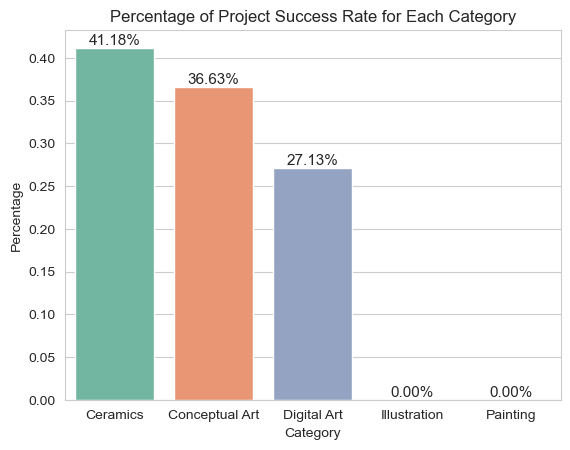

In [14]:
# Use bar charts to show each category's projects successfull rate
import matplotlib.pyplot as plt
import seaborn as sns

title = 'Percentage of Project Success Rate for Each Category'

sns.set_style("whitegrid") 
axes = sns.barplot(x=succes_rate.index, y=succes_rate, palette="Set2") 
axes.set_title(title)
axes.set(xlabel='Category', ylabel='Percentage')

for bar, rate in zip(axes.patches, succes_rate):
    text_x = bar.get_x() + bar.get_width() / 2.0 
    text_y = bar.get_height() 
    text = f'{rate:.2%}'
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

From the bar chart, we can see that:

1. Ceramics has the highest success rate of all categories.
2. No Illustration and Painting projects mange to the stage of success.

******Now we want to know which factor affects more on project success rate. Staff picks or spotlight?******

In [15]:
# Load the staff pick and spotlight data
staffpick_spotlight = df[['state', 'staff_pick', 'spotlight']].copy()

In [16]:
# Determine the total number of projects identified as staff picks and the total number of projects identified as spotlight.
mask4 = staffpick_spotlight['staff_pick'] == 1
staffpick = staffpick_spotlight[mask4]
print(staffpick)

mask5 = staffpick_spotlight['spotlight'] == 1
spotlight = staffpick_spotlight[mask5]
print(spotlight)

           state  staff_pick  spotlight
20    successful        True       True
21    successful        True       True
22    successful        True       True
23    successful        True       True
24    successful        True       True
...          ...         ...        ...
3033      failed        True      False
3034      failed        True      False
3035      failed        True      False
3036      failed        True      False
3037      failed        True      False

[224 rows x 3 columns]
           state  staff_pick  spotlight
0     successful       False       True
1     successful       False       True
2     successful       False       True
3     successful       False       True
4     successful       False       True
...          ...         ...        ...
3253  successful       False       True
3254  successful       False       True
3255  successful       False       True
3256  successful       False       True
3257  successful       False       True

[692 rows x 3 c

There are 224 staff pick projects and 692 spotlight projects.

In [17]:
# Calcualte the successful rate individually for staff picks and spotlight projects
mask6 = (staffpick_spotlight['staff_pick'] == 1) & (staffpick_spotlight['state'] == 'successful')
print(f'{(len(staffpick_spotlight[mask6]) / len(staffpick)):.2%}')

mask7 = (staffpick_spotlight['spotlight'] == 1) & (staffpick_spotlight['state'] == 'successful')
print(f'{(len(staffpick_spotlight[mask7]) / len(spotlight)):.2%}')

72.77%
100.00%


From the calculation, we can conclude that:
1. Staff pick projects have a chance of almost 73% to be successful.
2. But if a project is classified as spotlight, it is 100% guaranteed to be successful.

In [18]:
# Calcualte the percentage of success when a project is both staff pick and spotlight
mask8 = (staffpick_spotlight['staff_pick'] == 1) & staffpick_spotlight['spotlight'] == 1  & (staffpick_spotlight['state'] == 'successful')
print(f'{(len(staffpick_spotlight[mask8]) / len(staffpick_spotlight)):.2%}')

87.36%


From the calculation, now we can even further certain that:

1. If a project is awarded as both staff pick and spotlight, it will have a better chance of success than only awarded as staff picks.
2. It is reasonable to say that spotlight has higher influence on whether a pproject will success or not. (87.36% for both vs. 72.77% alone)

******Lastly, we investigate a liitle bit deeper to see whether there are other factors affecting people pledging projects on Kickstarter.******

In [19]:
df.head()

,id,name,goal,pledged,state,country,currency,currency_trailing_code,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight
0,1526127826,conceptual-waist-aprons,300.0,321.00,successful,US,USD,True,False,18,1.000000,321.000000,Conceptual Art,True
1,2007987502,mjolby-porslinsravsmuseum-pin,3000.0,7070.00,successful,SE,SEK,True,False,79,0.121226,857.068103,Conceptual Art,True
2,1075407414,cool-dog-annual-sticker-fund-2016,3200.0,4431.12,successful,US,USD,True,False,148,1.000000,4431.120000,Conceptual Art,True
3,1038608633,uss-coral-sea-cvb-cva-cv-43-commemorative-chal...,2100.0,2500.00,successful,US,USD,True,False,56,1.000000,2500.000000,Conceptual Art,True
4,451699826,amrita-bottles-inc,1950.0,2240.00,successful,US,USD,True,False,31,1.000000,2240.000000,Conceptual Art,True


In [20]:
df.columns

Index(['id', 'name', 'goal', 'pledged', 'state', 'country', 'currency',
       'currency_trailing_code', 'staff_pick', 'backers_count',
       'static_usd_rate', 'usd_pledged', 'category', 'spotlight'],
      dtype='object')

In [21]:
# Before we look at correlation, let's drop some of the nominal varaibles
df2 = df.copy()
df2.drop(['id', 'name', 'pledged', 'state', 'country', 'currency', 'currency_trailing_code', 'static_usd_rate', 'category'], axis=1, inplace=True)
df2

,goal,staff_pick,backers_count,usd_pledged,spotlight
0,300.0,False,18,321.000000,True
1,3000.0,False,79,857.068103,True
2,3200.0,False,148,4431.120000,True
3,2100.0,False,56,2500.000000,True
4,1950.0,False,31,2240.000000,True
...,...,...,...,...,...
4179,665.0,False,0,0.000000,False
4180,80000.0,False,0,0.000000,False
4181,132300.0,False,2,50.000000,False
4182,7500.0,False,2,220.237088,False


Text(0.5, 1.0, 'Correlation Heatmap')

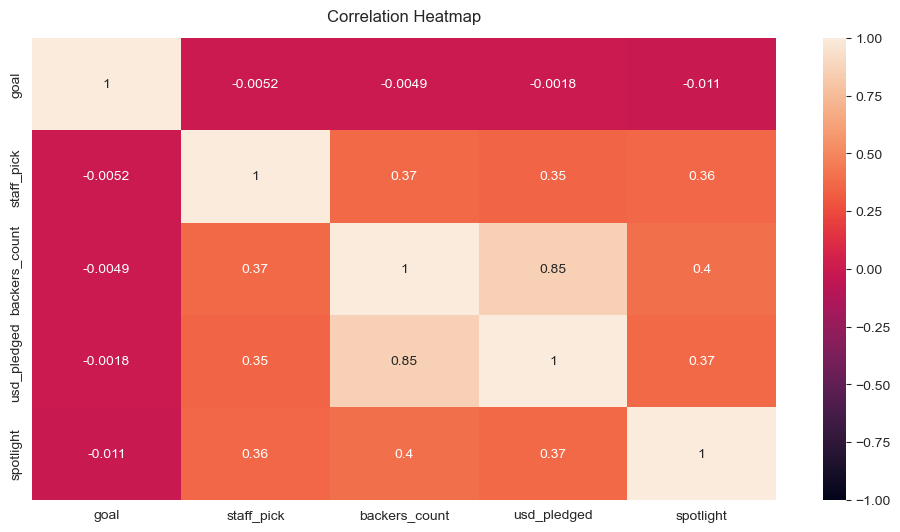

In [22]:
# Find the correlation among factors that might have effect on a project's pledge amount.
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

From the correlation heatmap, we can see that:

1. If a project has more backers, the projects tends to larger amount pledged, which seems reasonable.
2. However, the staff_picks' and spotlight's correlation to pledged amount do not seem quite right. We previosly just calculated the possiblilty of having both awards would generate a 87.36% of success.

## Self-reflection: For categorical variable correlation, what are the technique we can use?